In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_squared_error
from sklearn.tree import plot_tree


#----------------- Load Data -------------------------
iris=load_iris()
X, y = load_iris(return_X_y=True)

#---------------- Check the shape of data --------------
print("Features shape:", X.shape)
print("Labels shape:", y.shape)

#---------------- Visualize data ------------------

df = pd.DataFrame(iris.data, columns=iris.feature_names)

df
print(iris.feature_names)

Features shape: (150, 4)
Labels shape: (150,)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [46]:
df['target'] = iris.target

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [47]:
df['species'] = df['target'].map({i: name for i, name in enumerate(iris.target_names)})

print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  


In [48]:
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print(y)
print(feature_names)
print(target_names)
print(X)
pd.DataFrame(X)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:


# ----------------  Split into training and testing data -----------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# -------------- Create and train the Decision Tree model--------------------
model = DecisionTreeClassifier(criterion='gini', max_depth=13, random_state=42)
model.fit(X_train, y_train)

# ------------------------  Evaluate the model ----------------------
accuracy = model.score(X_test, y_test)
print("Model Accuracy on Test Set:", accuracy)

Model Accuracy on Test Set: 1.0



Decision Tree Structure (Text Format):
|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.60
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.60
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  4.95
|   |   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |   |--- class: 2
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- petal length (cm) <= 4.85
|   |   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |

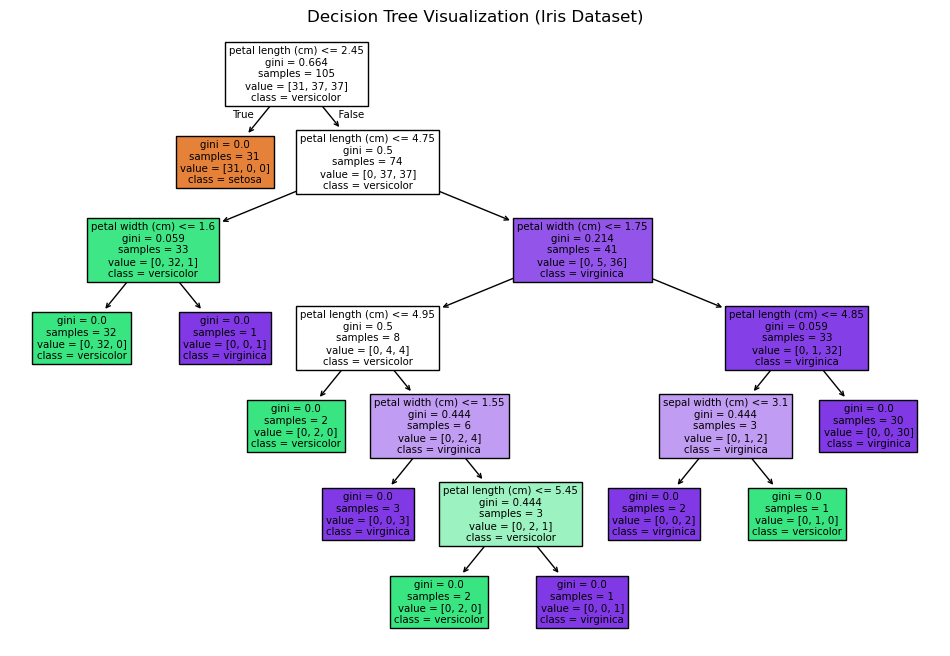


Feature Importances:
sepal length (cm): 0.0000
sepal width (cm): 0.0191
petal length (cm): 0.8933
petal width (cm): 0.0876


In [ ]:
# ------------ Display the structure of the tree (text-based) ---------------
print("\nDecision Tree Structure (Text Format):")
tree_text = export_text(model, feature_names=feature_names)
print(tree_text)


plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=feature_names, class_names=target_names, filled=True)
plt.title("Decision Tree Visualization (Iris Dataset)")
plt.show()


print("\nFeature Importances:")
for name, importance in zip(feature_names, model.feature_importances_):
    print(f"{name}: {importance:.4f}")

📊 Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

📋 Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


✅ Accuracy Score:
1.0

🧮 Mean Squared Error:
0.0


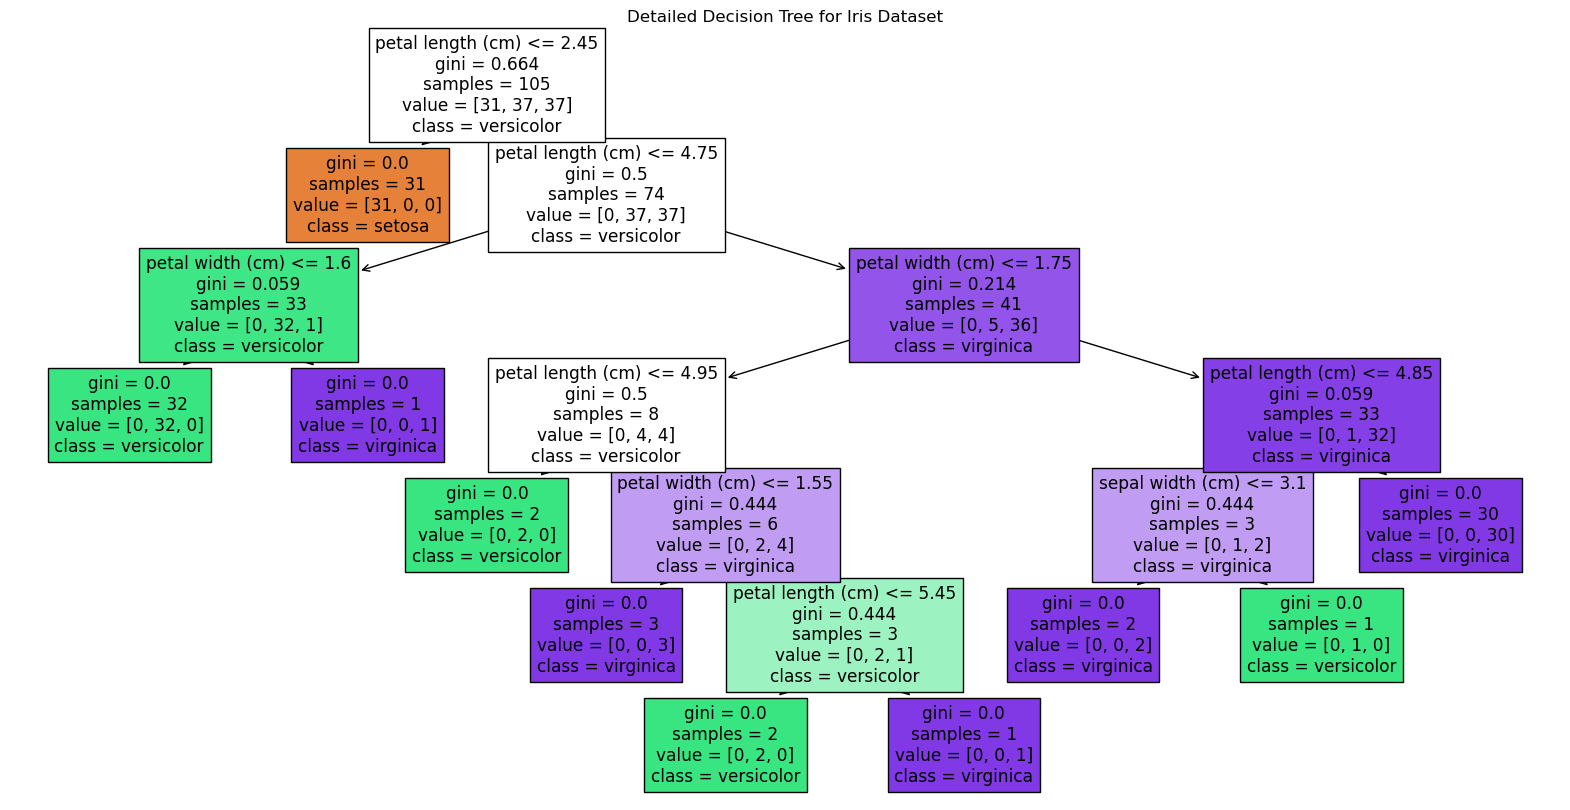

In [62]:
# --------------- Predict ------------------
y_pred = model.predict(X_test)

#------------- Evaluation Metrics ------
print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

print("\n✅ Accuracy Score:")
print(accuracy_score(y_test, y_pred))

print("\n🧮 Mean Squared Error:")
print(mean_squared_error(y_test, y_pred))


plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Detailed Decision Tree for Iris Dataset")
plt.show()


## Preprunning

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



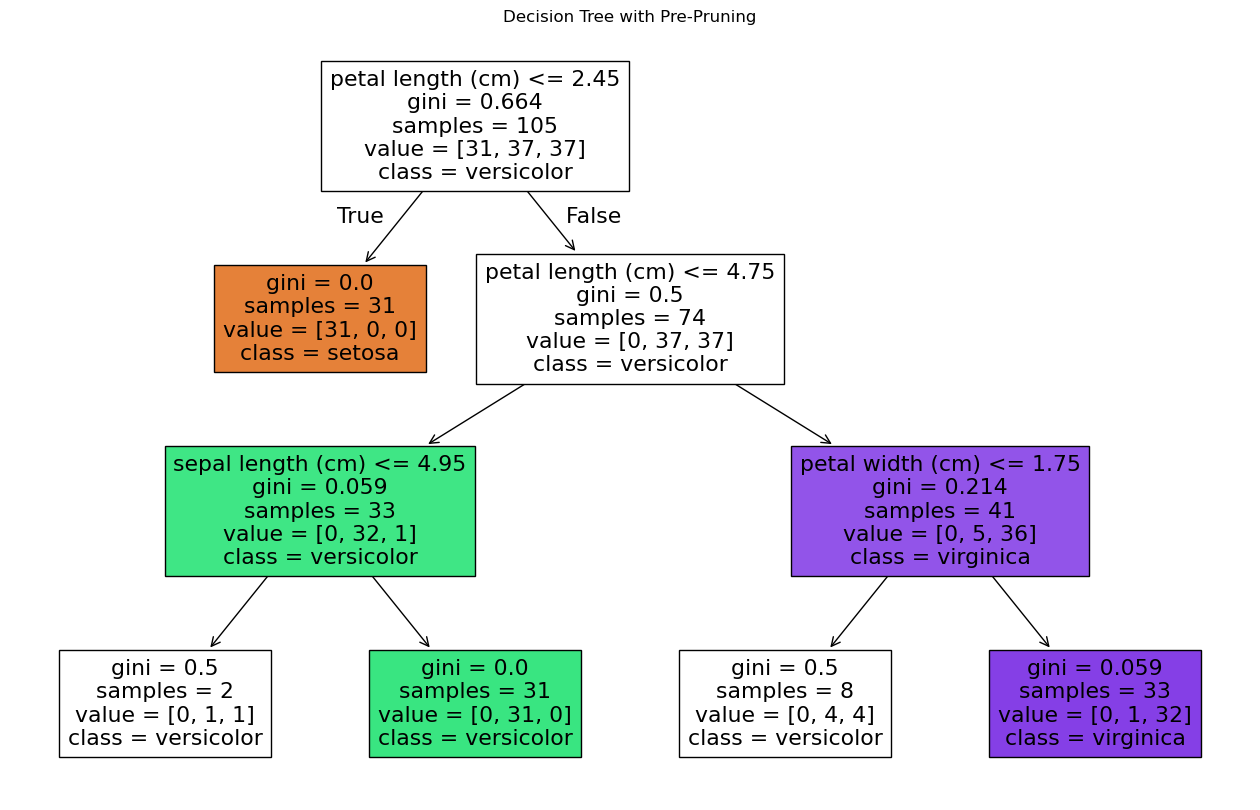

In [64]:

#---------- Decision Tree with Pre-Pruning -------------------
clf = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,              # Limit depth to 3
    min_samples_split=4,      
    min_samples_leaf=2,       
    random_state=42
)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot tree
plt.figure(figsize=(16, 10))
plot_tree(clf, filled=True, feature_names=load_iris().feature_names, class_names=load_iris().target_names)
plt.title("Decision Tree with Pre-Pruning")
plt.show()


## Hyperparameter

Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 6}

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



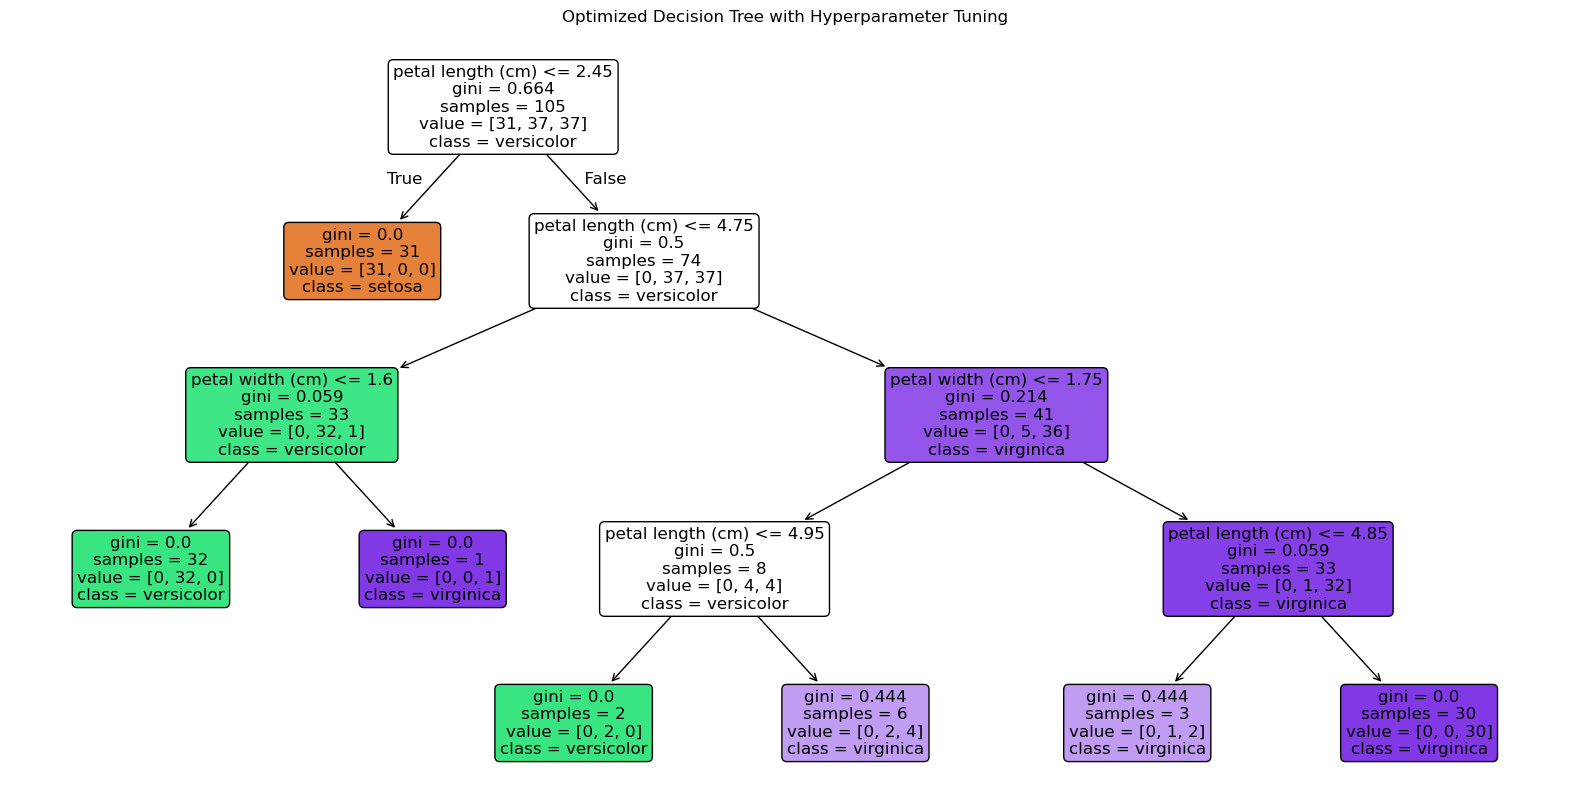

In [65]:


# -------------- Define Decision Tree model -----------
dtree = DecisionTreeClassifier(random_state=42)

# -------------- Define parameter grid for hyperparameter tuning ---------------
param_grid = {
    'max_depth': [2, 3, 4, 5, 6,10,13],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3],
    'criterion': ['gini', 'entropy']
}

# -------------------  GridSearchCV for hyperparameter tuning --------------------
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# --------------- Best parameters and estimator -------------------
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# -------------------- Predictions -------------------------------
y_pred = best_model.predict(X_test)

# -------------------- Evaluation -----------------------
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --------------------- Visualize the best decision tree --------------
plt.figure(figsize=(20, 10))  
plot_tree(
    best_model,
    filled=True,
    feature_names=load_iris().feature_names,
    class_names=load_iris().target_names,
    rounded=True,
    fontsize=12
)
plt.title("Optimized Decision Tree with Hyperparameter Tuning")
plt.show()
